In [2]:
%matplotlib inline
import matplotlib as plt

import numpy as np

import healpy as hp
import astropy.io.fits as fits

# MILCA

In [3]:
with fits.open("../data/y_maps/Planck/milca_ymaps.fits") as hdu:
    y_half_difference = (hdu[1].data["FIRST"]-hdu[1].data["LAST"])/2
    y_full = hdu[1].data["FULL"]

with fits.open("../data/y_maps/Planck/masks.fits") as hdu:
    y_mask_ps = hdu[1].data["M5"].astype(dtype=bool)
    # M1: 40%, M4: 70%
    y_mask_gal = hdu[1].data["M1"].astype(dtype=bool)

with fits.open("../data/y_maps/Planck/milca_stddev.fits") as hdu:
    y_stddev = hdu[1].data["M1"]


Save half difference map

In [ ]:
hp.write_map("../data/y_maps/polspice/milca_half_difference/triplet.fits", [y_half_difference, 
                                                                            np.random.randn(y_half_difference.size), 
                                                                            np.random.randn(y_half_difference.size)], overwrite=True)
hp.write_map("data/y_maps/Planck_processed/milca_half_difference.fits", y_half_difference)

## Create shear footprint
Smooth by 1 deg FWHM, reject pixels < 0.1.

In [4]:
shear_mask = hp.read_map("../data/shear_maps_KiDS1000/z0.9-1.2/doublet_mask.fits")

shear_mask[shear_mask < 1] = 0

shear_mask_fwhm_1deg = hp.sphtfunc.smoothing(shear_mask, fwhm=1.0/180*np.pi, iter=1)
shear_mask_fwhm_1deg[shear_mask_fwhm_1deg>0.1] = 1
shear_mask_fwhm_1deg[shear_mask_fwhm_1deg<=0.1] = 0

shear_mask_fwhm_1deg[shear_mask_fwhm_1deg < 1] = hp.UNSEEN

y_gal_ps_shear_footprint_mask = shear_mask_fwhm_1deg * y_mask_gal * y_mask_ps
y_gal_ps_shear_footprint_mask[y_gal_ps_shear_footprint_mask < 1] = hp.UNSEEN

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [ ]:
hp.write_map("../data/shear_maps_KiDS1000/footprint_masks/shear_footprint_1deg_smooth.fits", shear_mask_fwhm_1deg, 
             partial=True, dtype=np.float32, overwrite=True)
hp.write_map("../data/y_maps/Planck_processed/y_gal40_ps_shear_footprint_1deg_smooth.fits", y_gal_ps_shear_footprint_mask, 
             partial=True, dtype=np.float32, overwrite=True)


# NILC

In [10]:
with fits.open("../data/y_maps/Planck/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits") as hdu:
    y_half_difference = (hdu[1].data["FIRST"]-hdu[1].data["LAST"])/2

In [12]:
hp.write_map("../data/y_maps/Planck_processed/nilc_half_difference.fits", y_half_difference)

# Plots and scrapbook

In [12]:
with fits.open("/disk09/ttroester/Planck/CIB/polspice/2048/galactic/Planck-545/triplet.fits") as hdu:
    cib1 = hdu[1].data["I_STOKES"][:]

cib2 = hp.read_map("../data/CIB_maps/Planck/COM_CompMap_CIB-GNILC-F545_2048_R2.00.fits")

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [14]:
hdu = fits.open("../data/CIB_maps/Planck/COM_CompMap_CIB-GNILC-F545_2048_R2.00.fits")
hdu[1].header

XTENSION= 'BINTABLE'           /Written by IDL:  Fri May  6 14:35:37 2016       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                    4 /Number of bytes per row                         
NAXIS2  =             50331648 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    1 /Number of columns                               
TFORM1  = 'E       '           /Real*4 (floating point)                         
TTYPE1  = 'I       '           / Intensity map                                  
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
NSIDE   =                 20

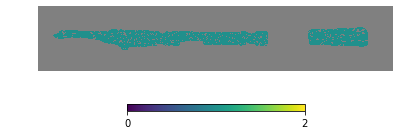

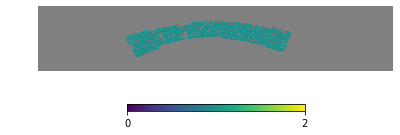

In [53]:
hp.gnomview(y_gal_ps_shear_footprint_mask, 
            rot=[182,0,0], reso=10, coord="GC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")
hp.gnomview(y_gal_ps_shear_footprint_mask, 
            rot=[9,-36,0], reso=10, coord="GC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")

In [8]:
np.sum(shear_mask*y_mask_gal*y_mask_ps) * hp.nside2pixarea(2048, degrees=True)

718.7918961754334

In [15]:
shear_mask = hp.read_map("../data/shear_maps_KiDS1000/z0.9-1.2/doublet_mask.fits")
shear_mask[shear_mask == hp.UNSEEN] = 0
shear_mask = shear_mask.astype(bool)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


Create half difference map

In [12]:
hp.write_map("../data/y_maps/polspice/milca_half_difference/triplet.fits", [y_half_difference, 
                                                                            np.random.randn(y_half_difference.size), 
                                                                            np.random.randn(y_half_difference.size)], overwrite=True)

In [7]:
for z_cut in ["z0.1-0.3", "z0.3-0.5", "z0.5-0.7", "z0.7-0.9", "z0.9-1.2"]:
    os.makedirs(f"../results/measurements/shear_KiDS1000_y_randoms/{z_cut}-milca_half_difference", exist_ok=True)

In [9]:
hdu = fits.open("../data/y_maps/polspice/milca/triplet.fits")
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   12 / length of dimension 1                          
NAXIS2  =             50331648 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'TEMPERATURE'                                                         
TFORM1  = 'E       '                                                            
TTYPE2  = 'Q_POLARISATION'                                                      
TFORM2  = 'E       '                                                            
TTYPE3  = 'U_POLARISATION'  

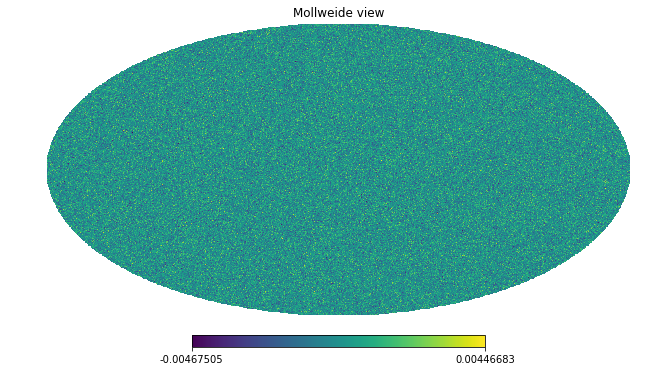

In [11]:
hp.mollview(hdu[1].data["U_POLARISATION"])

In [63]:
shear_map_0 = hp.read_map("../data/shear_maps_KiDS1000/z0.9-1.2/triplet.fits", hdu=1)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


In [41]:
y_var_map = hp.ud_grade(hp.ud_grade(y_half_difference**2, nside_out=128), nside_out=2048)

In [16]:
#hp.mollview(np.log10(y_stddev*1e6)*y_mask_ps)
#hp.mollview((np.sqrt(y_var_map)*1e6)*y_mask_ps*y_mask_gal*shear_mask)

hp.gnomview((np.sqrt(y_var_map)*1e6)*y_mask_ps*y_mask_gal*shear_mask, 
            rot=[182,0,0], reso=10, coord="GC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")
hp.gnomview((np.sqrt(y_var_map)*1e6)*y_mask_ps*y_mask_gal*shear_mask, 
            rot=[9,-36,0], reso=10, coord="GC", xsize=1100, ysize=200, 
            notext=True, cbar=True, title="")



NameError: name 'y_var_map' is not defined

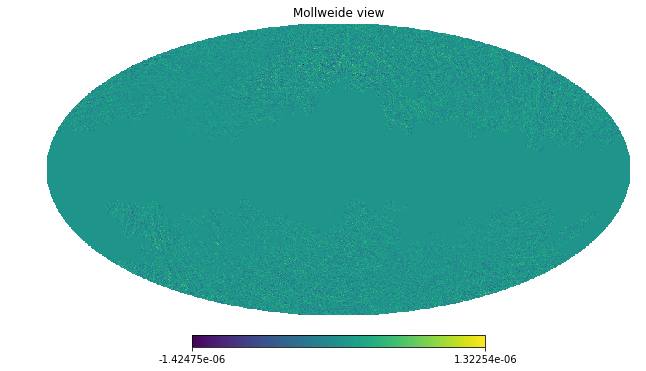

In [14]:
hp.mollview(y_full*y_mask_gal*y_mask_ps - (y_first+y_last)/2*y_mask_gal*y_mask_ps)

In [70]:
import pylenspice.pylenspice as pylenspice


In [71]:
pylenspice.write_partial_polarization_file([shear_map_0, shear_map_0, shear_map_0], 
                                            nside=2048, filename="test_triplet.fits", mask_value=hp.UNSEEN, coord="G")